In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from glob import glob
import os
import json 
import matplotlib.pyplot as plt

In [8]:
# json 파일 리스트 받아옴
tr_json_list = glob(data+'/train/*/*.json')

In [10]:
# (COLAB 실행시간 20분 20초 소요)
# 분석에 사용할 feature 선택 

data = 'train'
csv_features = ['내부 온도 1 평균', '내부 습도 1 평균', '내부 이슬점 평균']

csv_files = sorted(glob(data+'/train/*/*.csv'))
# csv_files = csv_files[:3]

img = [csv_file.split("/")[-1].split(".")[0] for csv_file in csv_files]
sq = []
tempe_avg = []
tempe_max = []
tempe_min = []
tempe_gap = []
tempe_std = []
humid_avg = []
humid_max = []
humid_min = []
humid_gap = []
humid_std = []
dew_avg = []
dew_max = []
dew_min = []
dew_gap = []
dew_std = []

# feature 별 통계량 계산
for csv in tqdm(csv_files):
    temp_csv = pd.read_csv(csv)[csv_features]
    temp_csv = temp_csv.replace('-',np.nan).dropna()
    if len(temp_csv) == 0:
        continue
    temp_csv = temp_csv.astype(float)
    temp_max, temp_min = temp_csv.max().to_numpy(), temp_csv.min().to_numpy()
    temp_avg, temp_std = temp_csv.mean().to_numpy(), temp_csv.std().to_numpy()
    temp_gap = temp_max - temp_min

    sq.append(len(temp_csv))
    tempe_avg.append(temp_avg[0])
    tempe_max.append(temp_max[0])
    tempe_min.append(temp_min[0])
    tempe_gap.append(temp_gap[0])
    tempe_std.append(temp_std[0])
    humid_avg.append(temp_avg[1])
    humid_max.append(temp_max[1])
    humid_min.append(temp_min[1])
    humid_gap.append(temp_gap[1])
    humid_std.append(temp_std[1])
    dew_avg.append(temp_avg[2])
    dew_max.append(temp_max[2])
    dew_min.append(temp_min[2])
    dew_gap.append(temp_gap[2])
    dew_std.append(temp_std[2])

df_csv = pd.DataFrame({'이미지':img, '측정건수':sq, '평균온도':tempe_avg, '최대온도':tempe_max, '최소온도':tempe_min, '온도차':tempe_gap, '온도표준편차':tempe_std,
                       '평균습도':humid_avg, '최대습도':humid_max, '최소습도':humid_min, '습도차':humid_gap, '습도표준편차':humid_std,
                       '평균이슬점':dew_avg, '최대이슬점':dew_max, '최소이슬점':dew_min, '이슬점차':dew_gap, '이슬점표준편차':dew_std})

df_csv.head()

100%|██████████| 5767/5767 [00:37<00:00, 155.62it/s]


,이미지,측정건수,평균온도,최대온도,최소온도,온도차,온도표준편차,평균습도,최대습도,최소습도,습도차,습도표준편차,평균이슬점,최대이슬점,최소이슬점,이슬점차,이슬점표준편차
0,train\10027\10027,588,10.304592,18.6,4.9,13.7,3.421103,77.991327,92.3,41.3,51.0,14.071773,6.361054,11.0,2.4,8.6,1.810841
1,train\10037\10037,294,23.227551,30.7,16.9,13.8,4.302657,78.339456,94.7,52.3,42.4,12.965715,19.013605,22.0,14.1,7.9,2.004522
2,train\10043\10043,294,22.120068,29.5,17.0,12.5,3.686222,78.362585,94.5,43.9,50.6,14.001203,17.871088,20.8,15.5,5.3,1.415425
3,train\10045\10045,294,21.886735,29.4,15.2,14.2,4.633142,76.133673,93.4,50.8,42.6,14.070662,17.152721,20.9,13.8,7.1,1.775884
4,train\10063\10063,294,22.108503,29.5,17.0,12.5,3.667005,78.597279,94.5,43.9,50.6,13.555775,17.925850,20.8,15.5,5.3,1.403024


In [11]:
# json 파일을 DataFraame으로 불러오고, 변수명을 한글로 변환 (Colab 실행시간 29분 3초 소요)
for i, json_file in enumerate(tqdm(tr_json_list)):
    with open(json_file, 'r') as f:
        json_file = json.load(f)
    json_file_re = {
      '주목객체': json_file['annotations']['bbox'],
      '병해부위': json_file['annotations']['part'],
      '촬영부위': json_file['annotations']['area'], 
      '작물': json_file['annotations']['crop'],
      '질병명': json_file['annotations']['disease'],
      '생육단계': json_file['annotations']['grow'],
      '피해정도': json_file['annotations']['risk'],
      '이미지': json_file['description']['image'],
      '촬영날짜': json_file['description']['date'],
      '촬영시간': json_file['description']['time'],
      'height': json_file['description']['height'],
      'width': json_file['description']['width'],
      '촬영지역': json_file['description']['region'],
      '데이터종류': json_file['description']['task']
      }
    if i == 0:
        tr_json_df = pd.json_normalize(json_file_re)
    else:
        tr_json_df = tr_json_df.append(pd.json_normalize(json_file_re))
tr_json_df = tr_json_df.reset_index(drop=True)

100%|██████████| 5767/5767 [00:17<00:00, 323.35it/s]


In [12]:
df_paprika = tr_json_df[tr_json_df["작물"]==3]

In [13]:
df_paprika_disease = df_paprika[df_paprika["질병명"]=="b8"]

In [72]:
# fig, axs = plt.subplots(figsize=(50,60) , ncols=2 , nrows=2)

# data = 'train'

# for num, i in enumerate(df_paprika_disease["이미지"].iloc[:4]):
#     # print(i[:-4])
#     # sample = glob(data+ f'\\train\\{i[:-4]}\\{i}')

#     row = int(num/2)
#     col = num%2
#     sample = data+ f'\\train\\{i[:-4]}'
#     # visual_csv = pd.read_csv(data+ f'\\train\\{i[:-4]}\\{i[:-4]}.csv')
#     sample_json = json.load(open(sample+f'\\{i[:-4]}.json', 'r'))
#     # print(sample)

#     # plt.figure(figsize=(7,7))
#     points = sample_json['annotations']['bbox'][0]
#     part_points = sample_json['annotations']['part']

#     # sample = data+ f'\\train\\{i[:-4]}'
#     # print(sample)
   
#     sample_image = cv2.imread(sample+f'\\{i}')

#     img = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

#     cv2.rectangle(
#         img,
#         (int(points['x']), int(points['y'])),
#         (int((points['x']+points['w'])), int((points['y']+points['h']))),
#         (0, 255, 0),
#         3
#     )
#     for part_point in part_points:
#         point = part_point
#         cv2.rectangle(
#             img,
#             (int(point['x']), int(point['y'])),
#             (int((point['x']+point['w'])), int((point['y']+point['h']))),
#             (255, 0, 0),
#             2
#         )
   
#     axs[row][col].axis('off')
#     axs[row][col].imshow(img)
#     # hist = cv2.calcHist([img],[0],None,[256],[0,256])
#     axs[row][col].set_title(i)

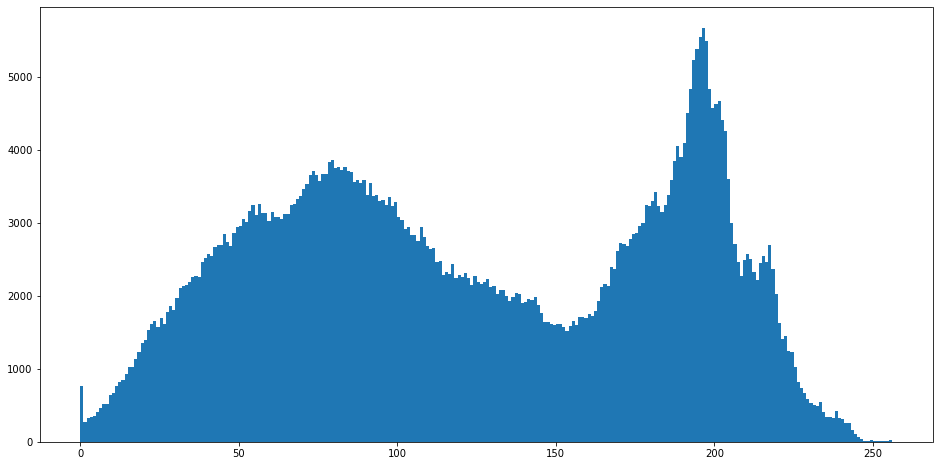

In [65]:
# visualize bbox
sample = data+ f'\\train\\{df_paprika_disease[:-4]}'
# sample_json = json.load(open(sample+f'\\{df_paprika_disease[:-4]}.json', 'r'))


plt.figure(figsize=(16,8))

n=10251
sample_image = cv2.imread(f'train\\train\\{n}\\{n}.jpg')

img = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

hist,bins = np.histogram(img.ravel(),256,[0,256])
  

# plt.imshow(img)


plt.hist(img.ravel(), 256, [0,256]); 
plt.show()

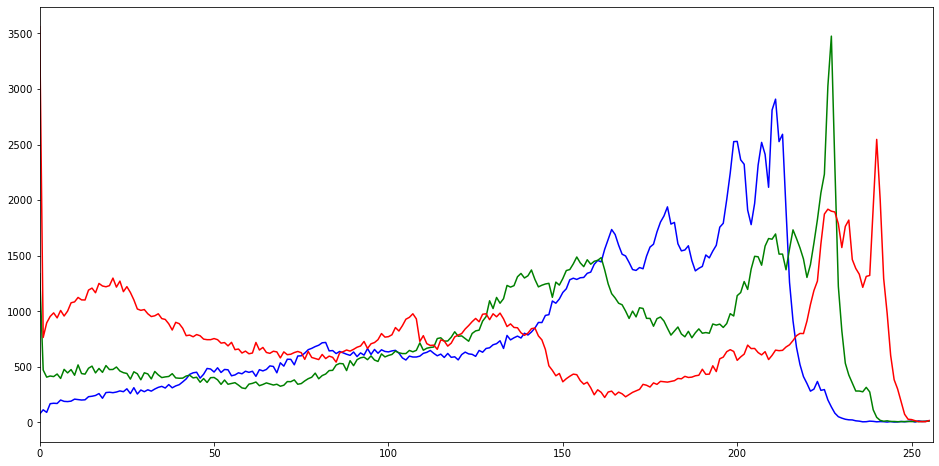

In [66]:
import cv2
from matplotlib import pyplot as plt

plt.figure(figsize=(16,8))

n=10037
sample_image = cv2.imread(f'train\\train\\{n}\\{n}.jpg')

img = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)


color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

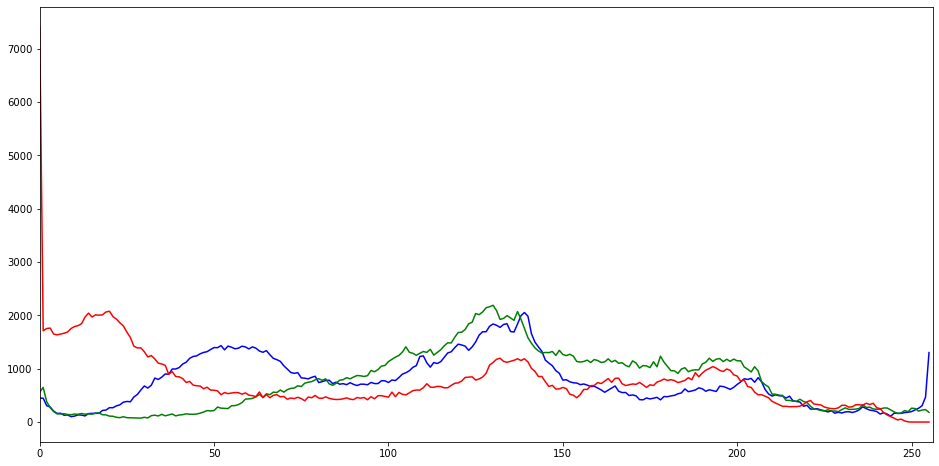

In [67]:
import cv2
from matplotlib import pyplot as plt

plt.figure(figsize=(16,8))

n=10045
sample_image = cv2.imread(f'train\\train\\{n}\\{n}.jpg')

img = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)


color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

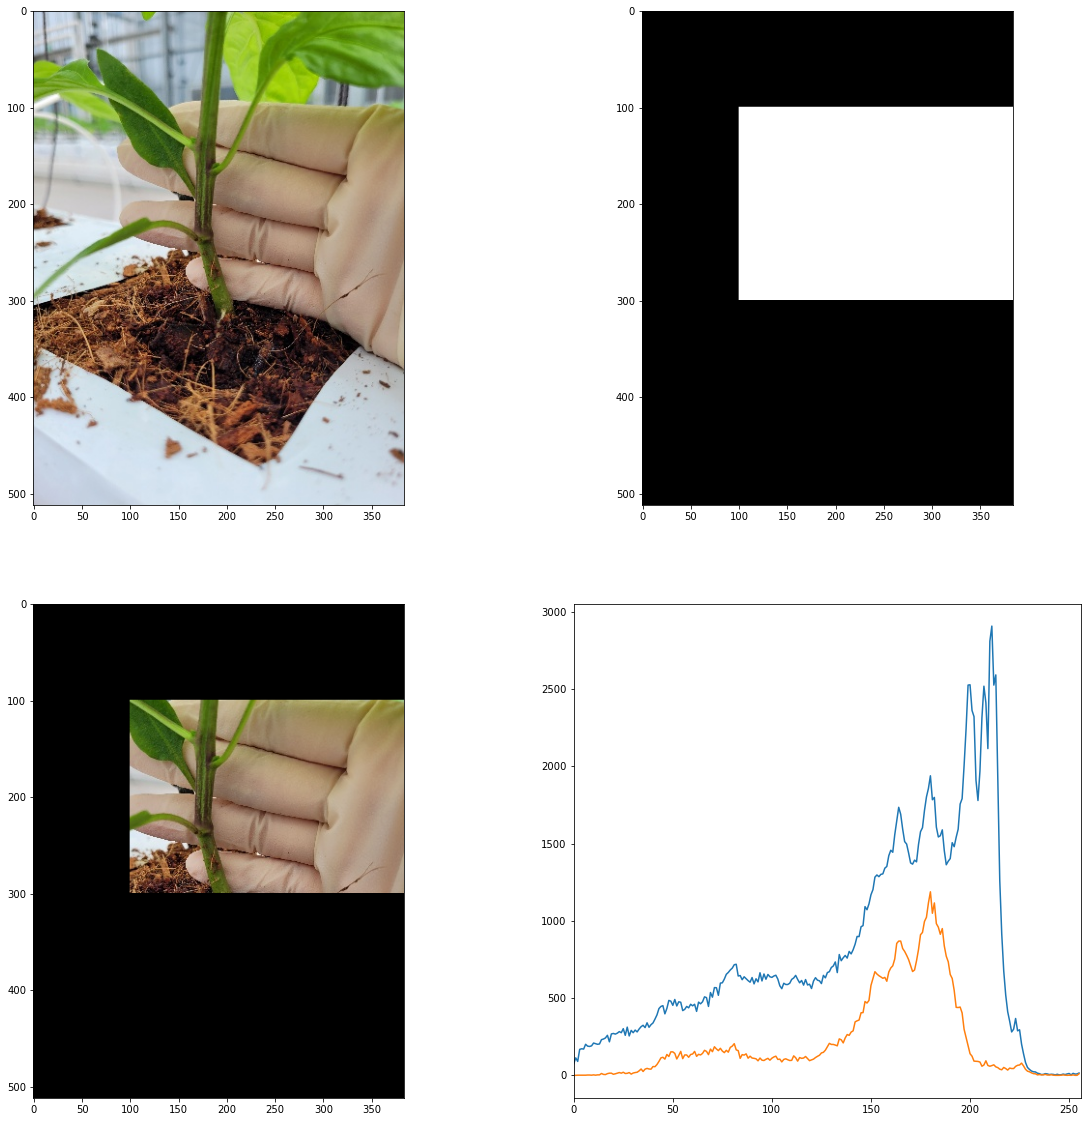

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(20,20))

n=10037
sample_image = cv2.imread(f'train\\train\\{n}\\{n}.jpg')

img = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

[[1.000e+01]
 [2.000e+00]
 [2.000e+00]
 [2.000e+00]
 [4.000e+00]
 [7.000e+00]
 [1.700e+01]
 [1.500e+01]
 [1.900e+01]
 [2.600e+01]
 [3.700e+01]
 [6.300e+01]
 [6.700e+01]
 [8.200e+01]
 [8.300e+01]
 [1.080e+02]
 [1.100e+02]
 [1.410e+02]
 [1.560e+02]
 [1.690e+02]
 [1.910e+02]
 [2.120e+02]
 [2.610e+02]
 [2.870e+02]
 [3.330e+02]
 [4.040e+02]
 [4.420e+02]
 [4.840e+02]
 [5.920e+02]
 [5.930e+02]
 [6.920e+02]
 [8.190e+02]
 [8.670e+02]
 [8.510e+02]
 [8.980e+02]
 [9.930e+02]
 [1.014e+03]
 [1.035e+03]
 [1.189e+03]
 [1.223e+03]
 [1.304e+03]
 [1.287e+03]
 [1.433e+03]
 [1.414e+03]
 [1.460e+03]
 [1.497e+03]
 [1.464e+03]
 [1.341e+03]
 [1.405e+03]
 [1.472e+03]
 [1.438e+03]
 [1.417e+03]
 [1.428e+03]
 [1.405e+03]
 [1.424e+03]
 [1.304e+03]
 [1.355e+03]
 [1.294e+03]
 [1.288e+03]
 [1.175e+03]
 [1.161e+03]
 [1.214e+03]
 [1.216e+03]
 [1.221e+03]
 [1.231e+03]
 [1.177e+03]
 [1.255e+03]
 [1.271e+03]
 [1.255e+03]
 [1.244e+03]
 [1.283e+03]
 [1.267e+03]
 [1.239e+03]
 [1.390e+03]
 [1.293e+03]
 [1.268e+03]
 [1.313e+03]

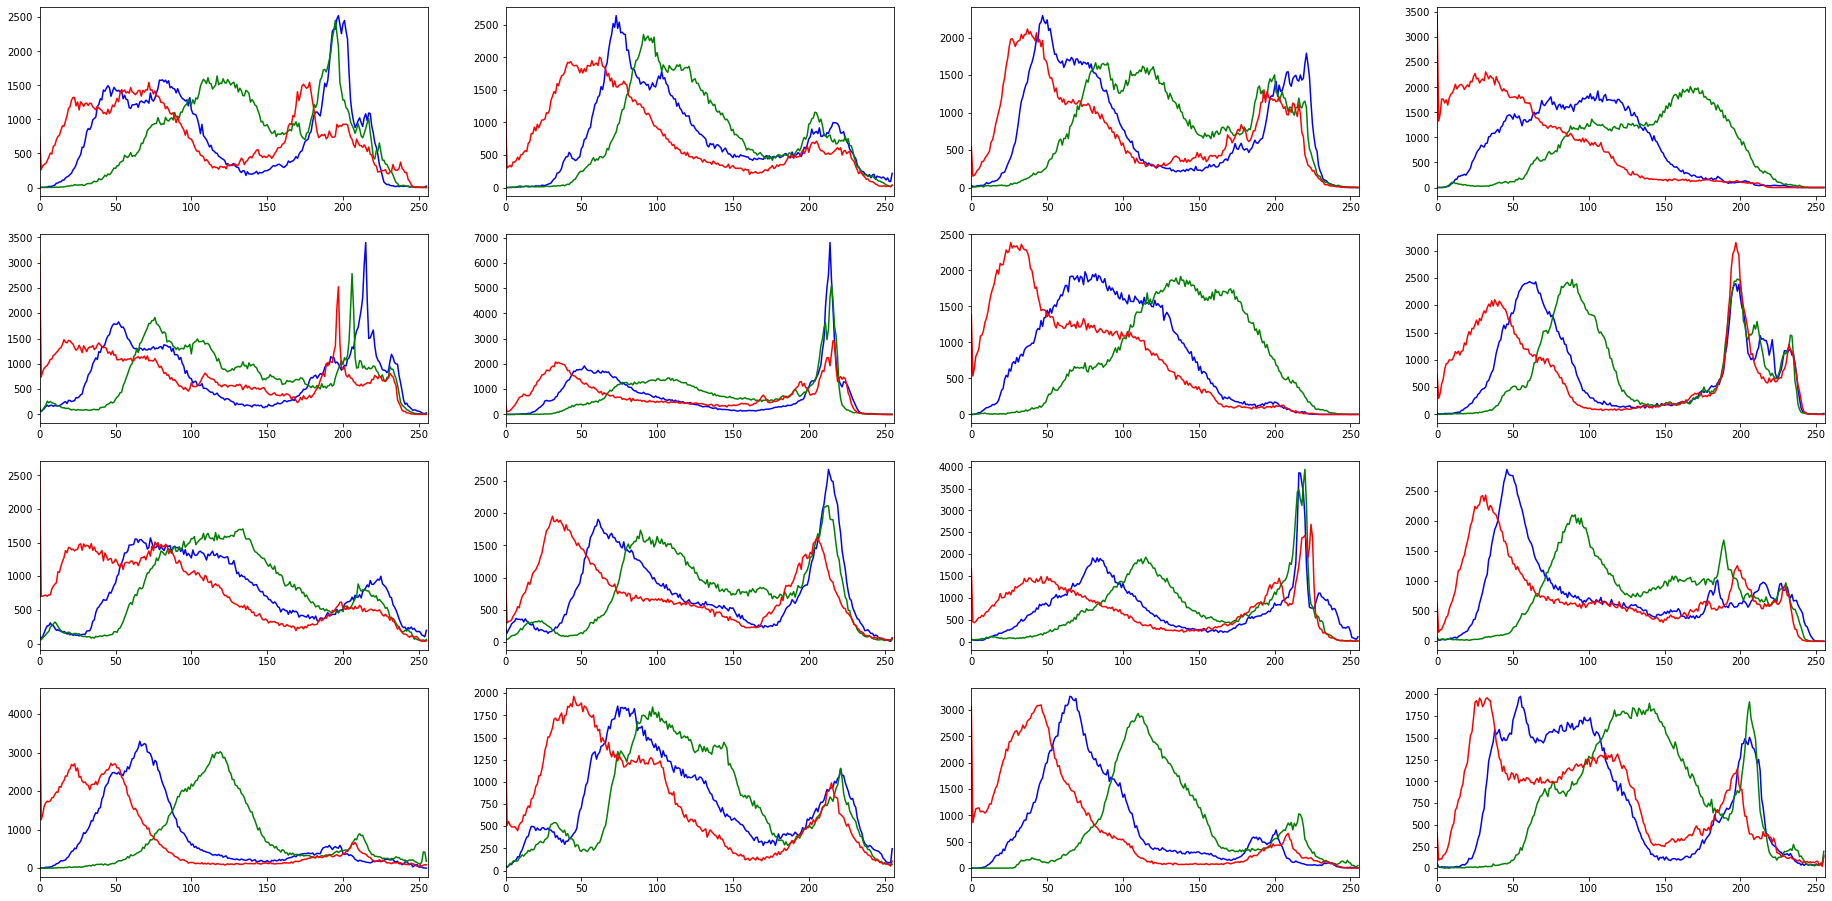

In [71]:
fig, axs = plt.subplots(figsize=(32,16) , ncols=4 , nrows=4,)

data = 'train'

R1_avg=[]
G1_avg=[]
B1_avg=[]

for num, i in enumerate(df_paprika_disease["이미지"].iloc[:16]):
    # print(i[:-4])
    # sample = glob(data+ f'\\train\\{i[:-4]}\\{i}')

    
    # print(sample)
    row = int(num/4)
    cols = num%4
    
    # print(sample_image)
    # img = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
    sample = data+ f'\\train\\{i[:-4]}\\{i}'
    
    color = ('b','g','r')
    sample_image = cv2.imread(sample)
    # plt.imshow(sample_image)
    img = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

    


    for j,col in enumerate(color):
               
        histr = cv2.calcHist([img],[j],None,[256],[0,256])
        axs[row,cols].plot(histr,color = col)
        print(histr)
        # axs[row][cols].xlim([0,256])
        axs[row,cols].axis(xmin=0,xmax=256)
        # print(sample,i,col,row,cols)

    
plt.show()
    

In [62]:
df_paprika_normal = df_paprika[df_paprika["질병명"]=="00"]

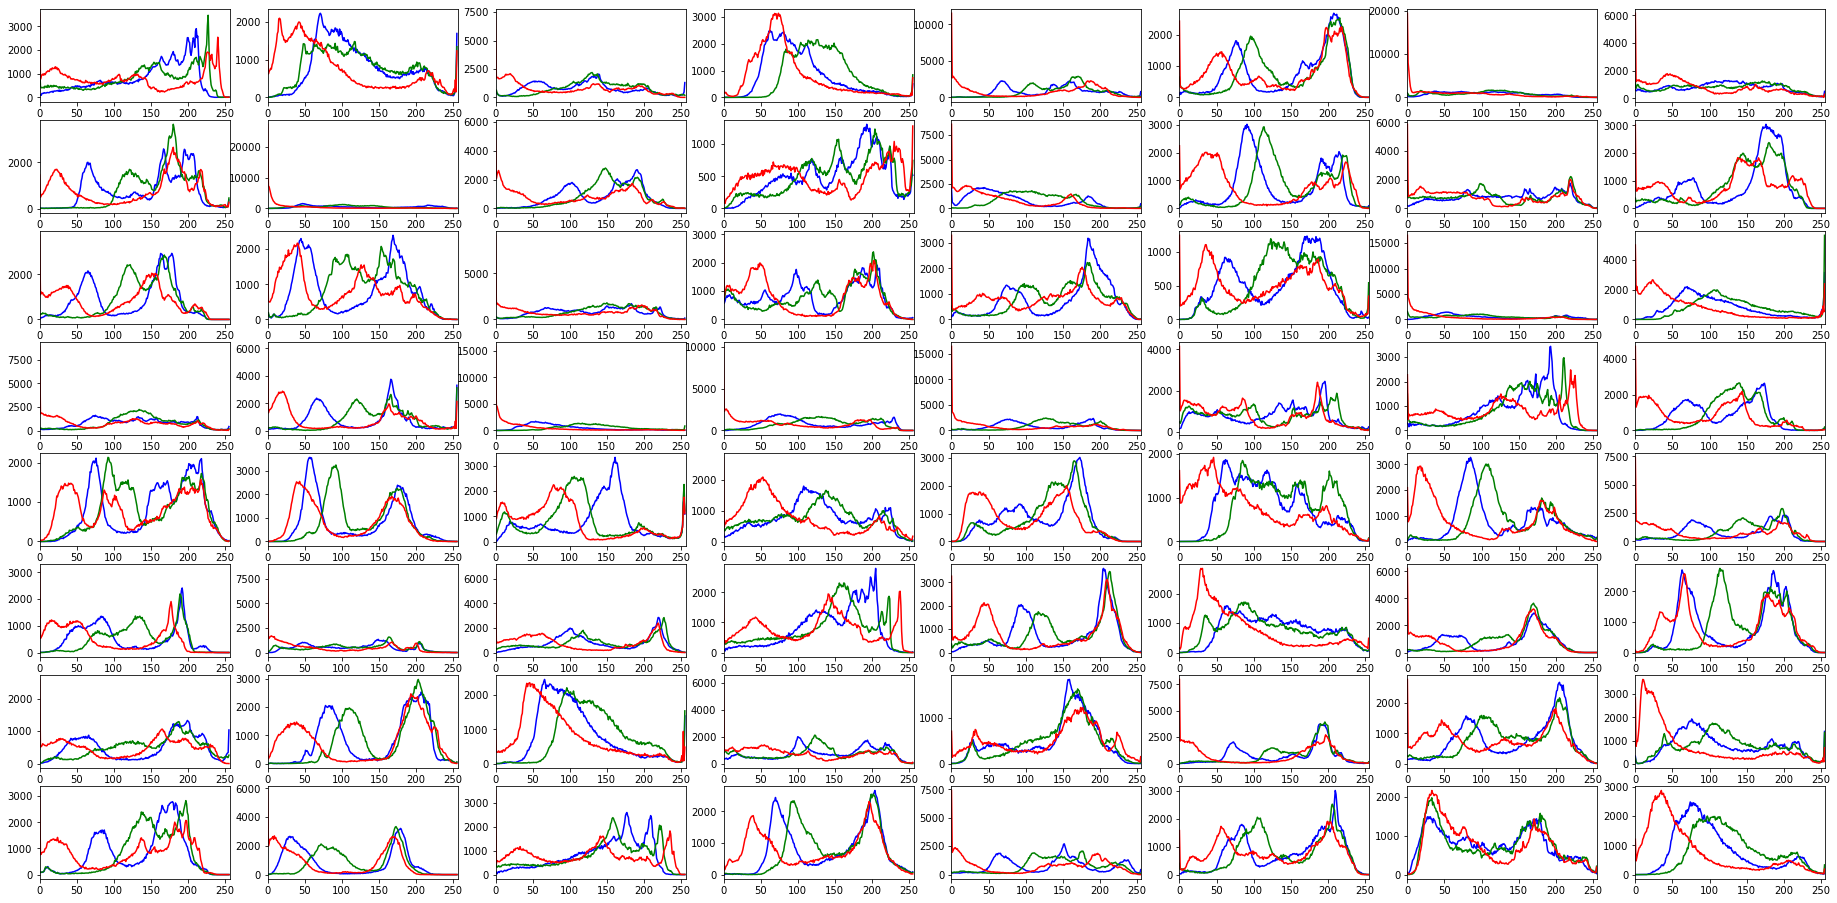

In [64]:
fig, axs = plt.subplots(figsize=(32,16) , ncols=8 , nrows=8,)

data = 'train'

for num, i in enumerate(df_paprika_normal["이미지"].iloc[:64]):
    # print(i[:-4])
    # sample = glob(data+ f'\\train\\{i[:-4]}\\{i}')

    
    # print(sample)
    row = int(num/8)
    cols = num%8
    
    # print(sample_image)
    # img = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
    sample = data+ f'\\train\\{i[:-4]}\\{i}'
    
    color = ('b','g','r')
    sample_image = cv2.imread(sample)
    # plt.imshow(sample_image)
    img = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

    img_data = []
    for j,col in enumerate(color):
        img_data.append(img)
        histr = cv2.calcHist([img],[j],None,[256],[0,256])
        axs[row,cols].plot(histr,color = col)
        # axs[row][cols].xlim([0,256])
        axs[row,cols].axis(xmin=0,xmax=256)
        # print(sample,i,col,row,cols)

    
plt.show()